In [2]:
# Pyton Package Installation

## virtual environment setup
%pip install conda

## nlp libraries
%pip install --upgrade gensim
%pip install top2vec

## machine learning libraries
%pip install transformers
%pip install torch

## visualization libraries
%pip install matplotlib
%pip install seaborn
%pip install pyldavis
%pip install cartopy

## datahandling libraries
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Bibliotheken

In [3]:
# Data handling
import csv
import pandas as pd

# NLP-Pipeline
import nltk 
import sklearn
import gensim
# import spaCy as sp
import re

# ML
import transformers
import torch 

## Embeddings

import top2vec as t2v 

## Visualisierung
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import pyLDAvis
import cartopy as ctp

# Sortieren
import venv
import numpy as np



# Explorative Datenanalyse (EDA)

# Datensatz laden

In [4]:
import pandas as pd
import csv

df1 = pd.read_csv('/Users/kaiweber/Documents/GitHub/DLBDSEDA02_Projekt_Advanced-Data-Analysis/src/complaints_data.csv')
df1.head(10)


,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t..."


## unstrukturierte Daten
### Duplikate

In [5]:
len(df1)

5659

In [6]:
# CSV laden
df2 = pd.read_csv('/Users/kaiweber/Documents/GitHub/DLBDSEDA02_Projekt_Advanced-Data-Analysis/src/complaints_data.csv')

# Doppelte Zeilen entfernen (erste behalten)
df2 = df2.drop_duplicates(subset=None, keep='first')
## len(df2) zählt alle Zeilen = 5653
len(df2)

5658

### Textlängenvergleich

Textlängen-Statistiken:
count     5628.000000
mean      1239.940121
std       1760.474721
min         35.000000
25%        527.000000
50%        870.000000
75%       1498.000000
max      93136.000000
Name: text_length, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


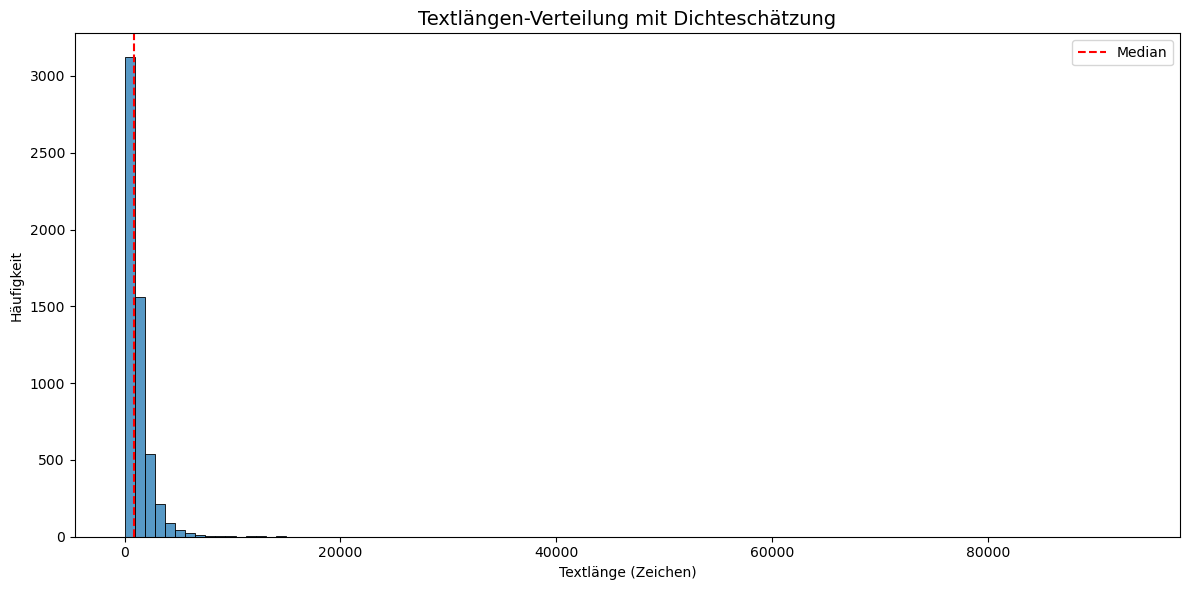

      Bin  Anzahl Prozent
     <100      24    0.4%
  100-500    1253   22.3%
 500-1000    1932   34.3%
1000-1500    1014   18.0%
1500-2000     542    9.6%
2000-2500     320    5.7%
2500-3000     180    3.2%
3000-3500     128    2.3%
    3500+     234    4.2%



In [7]:
# 1. Kopie + Index zurücksetzen von df2
df3 = df2.copy().reset_index(drop=True)

# 2. Länge berechnen
df3['text_length'] = df3['text'].str.len()

# 3. Statistiken
## describe() zeigt nur nicht-leere Werte → Count = 5628 (5653 - 25 NaT)
print("Textlängen-Statistiken:")
print(df3['text_length'].describe())

# 4. Histogramm
plt.figure(figsize=(12, 6))
sns.histplot(data=df3, x='text_length', bins=100)
plt.axvline(df3['text_length'].median(), color='red', linestyle='--', label='Median')
plt.title('Textlängen-Verteilung mit Dichteschätzung', fontsize=14)
plt.xlabel('Textlänge (Zeichen)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Berechnung
total_valid = df3['text_length'].count()  # 5628
## Definieren der Bins und Labels
bins = [0, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 90000]
labels = ['<100', '100-500', '500-1000', '1000-1500', '1500-2000', 
          '2000-2500', '2500-3000', '3000-3500', '3500+']

df3['length_bin'] = pd.cut(df3['text_length'], bins=bins, labels=labels, right=False)

## Tabelle mit Häufigkeiten und Prozenten
result = df3['length_bin'].value_counts().sort_index().reset_index()
result.columns = ['Bin', 'Anzahl']
result['Prozent'] = (result['Anzahl'] / total_valid * 100).round(1)
result['Prozent'] = result['Prozent'].astype(str) + '%'
print(result.to_string(index=False))
print()

## strukturierte Daten
Analyse der strukturiert vorliegenden Daten aus den Spalten "author" "posted_on" und "rating".
    ### Bundesstaaten 
        #### Beschwerden nach US-Bundesstaate
            #### Bundesstaaten mit Beschwerden
            #### Bundesstaaten ohne Beschwerden

    ### Daten (posted_on)
        #### Zeitraum

    ### Bewertung (rating)

## unstrukturierte Daten

In [8]:
### Verteilung der Beschwerden nach den Bundesstaaten
import pandas as pd
df = pd.read_csv('/Users/kaiweber/Documents/GitHub/DLBDSEDA02_Projekt_Advanced-Data-Analysis/src/complaints_data.csv')

#### Extrahieren der Bundesstaaten aus der "author"-Spalte
df["state"] = df["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)

##### State-Codes: alle extrahierten (2 Großbuchstaben am Ende)
all_extracted = df["state"].dropna().unique()

##### ungültige State-Codes
invalid_states = [s for s in all_extracted if s not in all_states_set]
print(f"Bundesstaaten ungültig: {len(invalid_states)} \n{sorted(invalid_states)}\n")

##### gültige State-Codes: US-Bundesstaaten (50 Staaten + DC / 51 Referenz)
all_states_set = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
}
all_states = pd.Series(list(all_states_set))

valid_states_only = df["state"].dropna()
valid_states_only = valid_states_only[valid_states_only.isin(all_states_set)]

#### Beschwerden nach US-Bundesstaaten
##### Bundesstaaten MIT Beschwerden
print(f"Bundesstaaten mit Beschwerden: {len(valid_states_only.value_counts())}")
for state, count in valid_states_only.value_counts().items():
    print(f"{state}: {count}")

##### Bundesstaaten OHNE Beschwerden
missing_states = all_states_set - set(valid_states_only.unique())
print(f"\nBundesstaaten ohne Beschwerden: {len(missing_states)}\n",
    sorted(missing_states), sep='')

print(f"\nKONTROLLE: {len(valid_states_only.value_counts())} + {len(missing_states)} = {len(valid_states_only.value_counts()) + len(missing_states)}")

/opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'all_states_set' is not defined

### Zeitdatenanalyse

In [10]:
# 1. Datum konvertieren (Format: "Nov. 22, 2016")
df['date'] = pd.to_datetime(df['posted_on'], format='mixed')

### Zeitdatenanalyse
print("===Zeitdatenanalyse===")
print(f"Erstes Datum:   {df['date'].min().strftime('%Y-%m-%d')}")
print(f"Letztes Datum:  {df['date'].max().strftime('%Y-%m-%d')}")
total_days = (df['date'].max() - df['date'].min()).days
years = total_days // 365
remaining_days = total_days % 365
print(f"Zeitraum:       {years} Jahre, {remaining_days} Tage ({total_days} Tage)")


### DATUM-KOMPONENTEN extrahieren
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['year_month'] = df['date'].dt.to_period('M')

### VERTEILUNGEN
print("\n=== VERTEILUNG ===")
print("Pro Jahr:")
print(df['year'].value_counts().sort_index())

print("\nPro Monat:")
print(df['month_name'].value_counts().sort_index())

print("\nPro Wochentag:")
print(df['weekday'].value_counts())

===Zeitdatenanalyse===
Erstes Datum:   2000-07-31
Letztes Datum:  2016-11-22
Zeitraum:       16 Jahre, 118 Tage (5958 Tage)

=== VERTEILUNG ===
Pro Jahr:
year
2000       1
2001       2
2002       1
2003       6
2004      10
2006      34
2007     106
2008     441
2009     462
2010     415
2011     357
2012     418
2013     313
2014     770
2015    1477
2016     846
Name: count, dtype: int64

Pro Monat:
month_name
April        369
August       540
December     426
February     476
January      485
July         529
June         461
March        441
May          394
November     505
October      526
September    507
Name: count, dtype: int64

Pro Wochentag:
weekday
Wednesday    993
Tuesday      960
Thursday     861
Monday       820
Friday       802
Saturday     659
Sunday       564
Name: count, dtype: int64
